# **Blinkit analysis**

---
the project aims to conduct analysis of Blinkit's sales performance, cutomer satisfaction, and inventory distribution to identify key insights and opportunities for improvement using various KPIs. 

## **KPIs**: 
- _**Total sales**_: the overall revenue generated from all itms sold. 
- _**Average sales**_: the average revenue per sale.
- _**Number of items**_: the total count of different items sold. 
- _**Average rating**_: the average customer rating given to Blinkit's products.

## **Charts**:
1. _**Total sales by fat content**_
- _**Objective**_: analyze the sales performance of different fat content products
- _**Additional KPI metrics**_: asssess how other KPIs (total sales, average sales, number of items) vary with fat content
- _**Chart type**_: Donut chart

2. _**Total sales by item type**_
- _**Objective**_: analyze the sales performance of different item types
- _**Additional KPI metrics**_: asssess how other KPIs (total sales, average sales, number of items) vary with item type
- _**Chart type**_:  Bar chart

3. _**Fat content by outlet for total sales**_
- _**Objective**_: analyze the sales performance across different outlets based on fat content
- _**Additional KPI metrics**_: asssess how other KPIs (total sales, average sales, number of items) vary with fat content
- _**Chart type**_:  Stacked column chart

4. _**Total sales by outlet establishment**_
- _**Objective**_: analyze the sales performance across different outlets based on outlet establishment year
- _**chatt type**_:  Line chart

5. _**Sales by outlet size**_
- _**Objective**_: analyze the sales performance across different outlets based on outlet size
- _**chatt type**_:  Pie chart

6. _**Sales by outlet location**_
- _**Objective**_: analyze the sales performance across different outlets based on outlet location
- _**chatt type**_:  Map chart 





## **EDA and Data cleaning**

In [60]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [61]:
df=pd.read_csv(r'C:\Users\08042\Desktop\projects\blinkit project\blinkit_data.csv')
df.head(10)
df.columns


Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [62]:
# EDA & Data Cleaning
df.dtypes
df.isna().sum()
df.duplicated().sum()
print(df['Item Fat Content'].unique())
df['Item Fat Content']=df['Item Fat Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']
['Regular' 'Low Fat']


In [63]:
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,Low Fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,Low Fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,Low Fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,Regular,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


## **Bussiness Insights and Analysis: KPIs**

In [64]:
# Business Insights & Analysis
# kpi 1: Total Sales 
Total_sales =df['Sales'].sum()
print(f'Total_sales: ${Total_sales:,.0f}')

# kpi 2: averge sales 
Averge_sales=df['Sales'].mean()
print(f'Averge_sales: ${Averge_sales:,.0f}')

# kpi 3: total items sold 
print(f'Total_items_sold: {df.shape[0]:,.0f}')

# kpi 4: average rating 
Averge_rating=round(df['Rating'].mean(),2)
print(f'Averge_rating: {Averge_rating:,.1f}')

Total_sales: $1,201,681
Averge_sales: $141
Total_items_sold: 8,523
Averge_rating: 4.0


## **Bussiness Insights and Analysis: Charts**

### 1. Total sales by fat content 

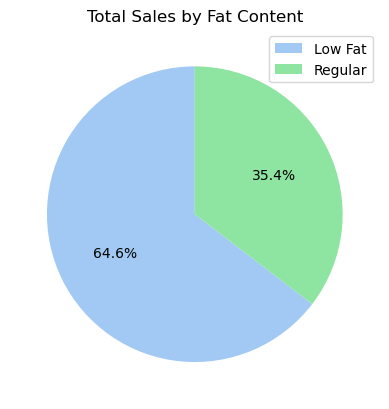

In [65]:

sales_by_fat=df.groupby('Item Fat Content')['Sales'].sum()
sales_by_fat
plt.pie(sales_by_fat,autopct='%1.1f%%',startangle=90,colors=sns.color_palette('pastel6'))
plt.title('Total Sales by Fat Content')
plt.legend(sales_by_fat.index)
plt.show()


### 2. Total sales by item type

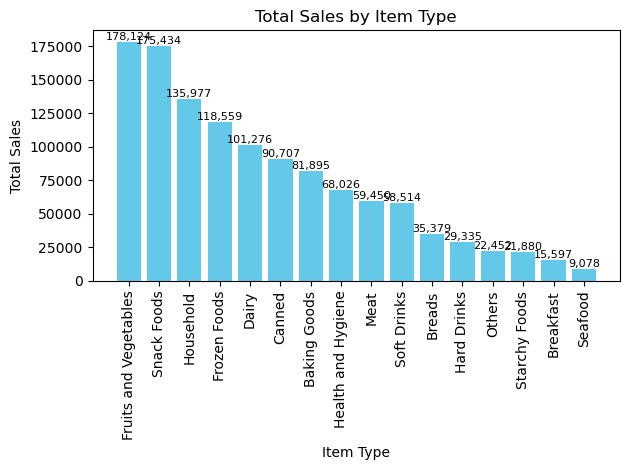

In [66]:
sales_by_itemtype=df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
bars=plt.bar(sales_by_itemtype.index, sales_by_itemtype.values, color= "#64C9E8")
plt.xticks(rotation=90)
plt.title('Total Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.tight_layout()
for bar in bars: 
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize=8)
plt.show()

### 3. Fat content by outlet location for total sales

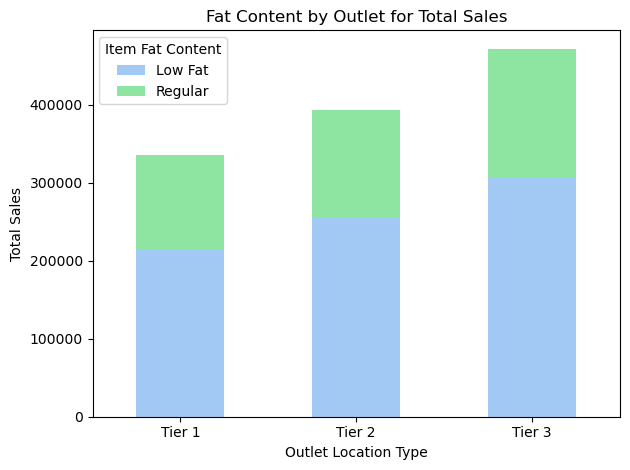

In [67]:
fat_content_by_outlet=df.pivot_table(values='Sales', index='Outlet Location Type', columns='Item Fat Content', aggfunc='sum')
fat_content_by_outlet.plot(kind='bar', stacked=True, color=sns.color_palette('pastel6'))
plt.title('Fat Content by Outlet for Total Sales')
plt.xticks(rotation=0)
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()


### 4. Total sales by outlet establishment 

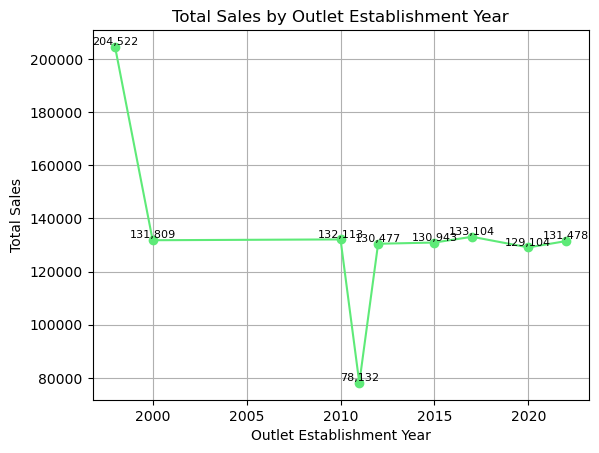

In [68]:
Total_sales_by_establishment=df.groupby('Outlet Establishment Year')['Sales'].sum()
Total_sales_by_establishment.plot(kind='line', marker='o', color="#5EEA78")
plt.title('Total Sales by Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')     
plt.ylabel('Total Sales')
plt.grid()  
for x, y in zip(Total_sales_by_establishment.index, Total_sales_by_establishment.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)
plt.show()

### 5. Sales by outlet size 

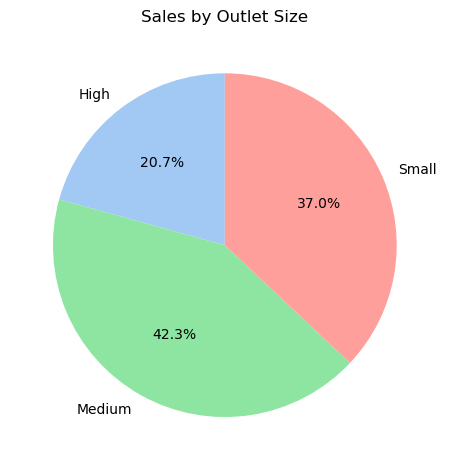

In [75]:
sales_by_outletsize=df.groupby('Outlet Size')['Sales'].sum().sort_index(ascending=True)
sales_by_outletsize.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel6'))
plt.title('Sales by Outlet Size')
plt.ylabel('')
plt.tight_layout()
plt.show()

### 6. Sales by outlet location


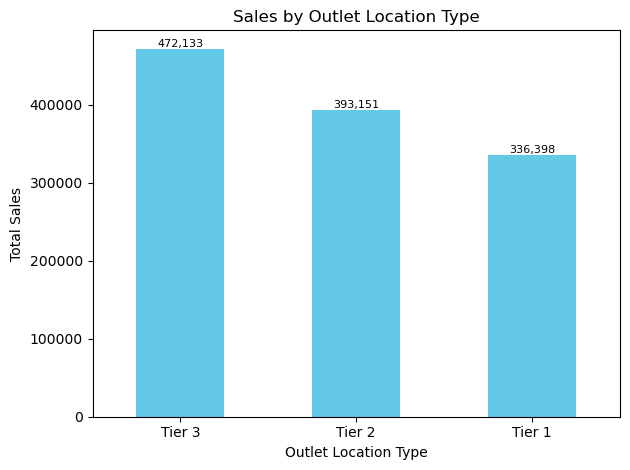

In [82]:
sales_by_outlet_location=df.groupby('Outlet Location Type')['Sales'].sum().sort_values(ascending=False)
sales_by_outlet_location.plot(kind='bar', color="#63C9E6")
plt.title('Sales by Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
for i, v in enumerate(sales_by_outlet_location):
    plt.text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()